# Imports

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display

# Load Data

## Original

In [3]:
original = pd.read_excel("BioDeconProcessed_Original.xlsx", sheet_name="ProcessedData")

In [6]:
list(original.AppMeth.unique())

['suspension',
 'liquid suspension',
 'fumigation',
 'physical',
 'liquid spray',
 'liquid immersion',
 'liquid',
 'liquid (ambiguous)',
 'foam spray',
 'liquid ambiguous',
 'foam ambiguous',
 'liquid dropper',
 'immersion',
 'aqueous suspension',
 'liquid soaked gauze wipe',
 'liquid soaked gauze covering',
 'gel',
 'aerosol',
 nan,
 'fogging',
 'fumigation/liquid',
 'liquid wipe',
 'solid powder']

In [7]:
list(original.columns)

['EntryDate',
 'ENRec',
 'Ref',
 'PhysState',
 'GrimeDirt',
 'AppMeth',
 'Loading',
 'ContTimeDesc',
 'LoadingUn',
 'CoupArea',
 'CoupAreaUn',
 'InocMeth',
 'SampMeth',
 'Rinsate',
 'RinsateUn',
 'ConcDoseUn',
 'Reapp',
 'AppMethNote',
 'Strain',
 'ConcDose',
 'ConcDoseCtrl',
 'Temp',
 'TempCtrl',
 'RHCtrl',
 'VendProd',
 'RH',
 'DeconAgent',
 'SurfMed',
 'ContTime',
 'ContTimeUn',
 'EffGreater',
 'EffMeas',
 'Eff',
 'EffVar',
 'LPosRec',
 'EffVarStat',
 'N',
 'MatComp',
 'VolApp',
 'VolAppUn',
 'CT',
 'CTUn',
 'VendProdDeconAgent',
 'VendProdDeconAgentSurfMed',
 'entry_order',
 'RinsateLess',
 'Positives',
 'WaterRinse',
 'VolAppDenUn',
 'VendProdDeconAgentAppMeth',
 'Surface',
 'TempNumCheck',
 'TempNum',
 'ConcDoseNumCheck',
 'ConcDoseNum',
 'ContTimeNumCheck',
 'ContTimeNum',
 'ContTimeNumMin',
 'ContTimeNumHrs',
 'LoadingNumCheck',
 'LoadingNum',
 'TotalApp',
 'RHNumCheck',
 'RHNum',
 'DeconMethod',
 'VolAppDen(L/m^2)',
 'ClO2(ppm)',
 'MB(mg/L)',
 'H2O2(ppm)',
 'PosCalc',
 'LPosRe

In [8]:
original[pd.isna(original.AppMeth)]

,EntryDate,ENRec,Ref,PhysState,GrimeDirt,AppMeth,Loading,ContTimeDesc,LoadingUn,CoupArea,...,TotalApp,RHNumCheck,RHNum,DeconMethod,VolAppDen(L/m^2),ClO2(ppm),MB(mg/L),H2O2(ppm),PosCalc,LPosRecCalc
4170,2017-10-25 00:00:00,52,Wallace 2005,surface,NaN,NaN,10^8 - 10^9,10,CFU/ml,5,...,NaN,False,unlisted,unlisted,NaN,NaN,NaN,NaN,0.0,NaN
4171,2017-10-25 00:00:00,52,Wallace 2005,surface,NaN,NaN,10^6 - 10^7,10,CFU/ml,5,...,NaN,False,unlisted,unlisted,NaN,NaN,NaN,NaN,0.0,NaN
4172,2017-10-25 00:00:00,52,Wallace 2005,surface,NaN,NaN,10^7,10,CFU/ml,5,...,NaN,False,unlisted,unlisted,NaN,NaN,NaN,NaN,0.0,NaN
4173,2017-10-25 00:00:00,52,Wallace 2005,surface,NaN,NaN,10^8 -10^9,10,CFU/ml,5,...,NaN,False,unlisted,unlisted,NaN,NaN,NaN,NaN,0.0,NaN


## Emily's Processed

In [132]:
origProcessed = pd.read_excel("MasterDataBreakdown.xlsx")

In [133]:
list(origProcessed.columns)

['Ref',
 'GrimeDirt',
 'AppMeth',
 'LoadingUn',
 'LoadingNum',
 'ConvertedLoading',
 'ConvertedLoadingUn',
 'CoupArea',
 'CoupAreaUn',
 'ConvertedCoupArea',
 'ConvertedCoupAreaUn',
 'Rinsate',
 'RinsateUn',
 'ConcDoseCtrl',
 'ConcDoseNum',
 'ConcDoseUn',
 'ConvertedConcDose',
 'ConvertedConcDoseUn',
 'TempCtrl',
 'TempNum',
 'RHCtrl',
 'RHNum',
 'SurfMed',
 'ContTimeDesc',
 'ContTimeNumMin',
 'TotalApp',
 'EffGreater',
 'Eff',
 'EffMeas',
 'EffVar',
 'EffVarStat',
 'ConvertedEff',
 'ConvertedEffMeas',
 'LPosRec',
 'N',
 'MatComp',
 'VolApp',
 'VolAppUn',
 'ConvertedVolApp',
 'ConvertedVolAppUn',
 'CT',
 'CTUn',
 'RinsateLess',
 'Positives',
 'WaterRinse',
 'Surface',
 'VolAppDen(L/m^2)',
 'VolAppDenUn',
 'ClO2(ppm)',
 'MB(mg/L)',
 'H2O2(ppm)',
 'PosCalc',
 'LPosRecCalc']

In [134]:
list(origProcessed.AppMeth.unique())

['Aerosol',
 'Aqueous Suspension',
 'Foam Ambiguous',
 'Foam Spray',
 'Fogging',
 'Fumigation',
 'Fumigation Liquid',
 'Gel',
 'Immersion',
 'Liquid',
 'Liquid Ambiguous',
 'Liquid Dropper',
 'Liquid Immersion',
 'Gauze Covering',
 'Gauze Wipe',
 'Liquid Spray',
 'Liquid Suspension',
 'Liquid Wipe',
 'Physical',
 'Solid Powder',
 'Suspension']

In [135]:
methodRename = {
    'Aerosol': 'Aerosol',
    'Foam Ambiguous': 'Foam Spray',
    'Foam Spray': 'Foam Spray',
    'Fogging': 'Fogging',
    'Fumigation': 'Fumigation',
    'Fumigation Liquid': 'Liquid Spray',
    'Gel': 'Gel',
    'Immersion': 'Liquid Immersion',
    'Liquid': 'Liquid Spray',
    'Liquid Ambiguous': 'Liquid Spray',
    'Liquid Dropper': 'Liquid Spray',
    'Liquid Immersion': 'Liquid Immersion',
    'Gauze Covering': 'Gauze Covering',
    'Gauze Wipe': 'Gauze Covering',
    'Liquid Spray': 'Liquid Spray',
    'Liquid Suspension': 'Liquid Suspension',
    'Liquid Wipe': 'Liquid Wipe',
    'Physical': 'Physical'
}

In [136]:
methodsToDrop = [
    "Aqueous Suspension",
    "Solid Powder",
    "Suspension"
]

In [137]:
origProcessed = origProcessed[origProcessed.AppMeth.apply(lambda x: x not in methodsToDrop)].copy()

In [138]:
origProcessed["AppMeth"] = origProcessed.AppMeth.apply(lambda x: methodRename[x])

In [139]:
list(origProcessed.AppMeth.unique())

['Aerosol',
 'Foam Spray',
 'Fogging',
 'Fumigation',
 'Liquid Spray',
 'Gel',
 'Liquid Immersion',
 'Gauze Covering',
 'Liquid Suspension',
 'Liquid Wipe',
 'Physical']

In [140]:
origProcessed["N"] = origProcessed.N.apply(lambda x: float(str(x).replace("<", "").replace(">", "").split("-")[0].replace("\"", "").split("or")[0]))

In [143]:
def conv(x):
    try:
        return float(str(x).split('-')[0])
    except ValueError:
        return np.nan
origProcessed["Eff"] = origProcessed.Eff.apply(lambda x: conv(x))

In [144]:
params = [
    ("ConvertedCoupArea", "Coupon Area (m^2)", True),
    ("LoadingNum", "Spore Loading (CFU)", True),
    ("N", "Number of Applications", True),
    ("TempNum", "Temperature (C)", False),
    ("RHNum", "Relative Humidity (%)", False, lambda x: x.RHNum <= 100),
    ("ContTimeNumMin", "ContactTime (min)", True, lambda x: x.ContTimeNumMin > 1e-6),
    ("ConcDoseNum", "Concentration (wt %)", False, lambda x: x.ConcDoseUn == "wt%"),
    ("Eff", "Efficacy (Log Reduction)", True, lambda x: x.EffMeas == "LR"),
    ("Eff", "Efficacy (% Kill)", True, lambda x: x.EffMeas == "%Kill"),
    ("Eff", "Efficacy (% Survived)", True, lambda x: x.EffMeas == "%Surv")
]

Coupon Area (m^2)


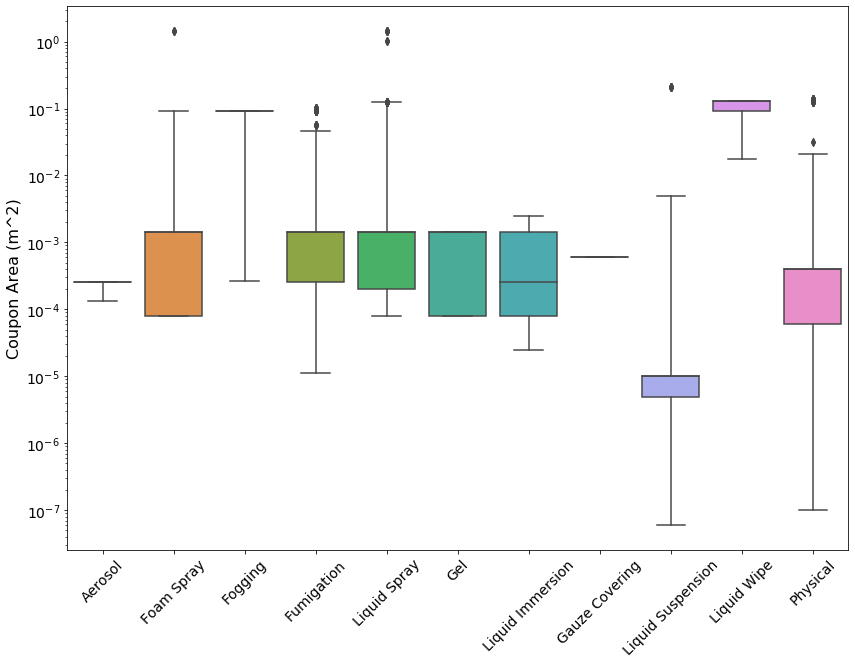

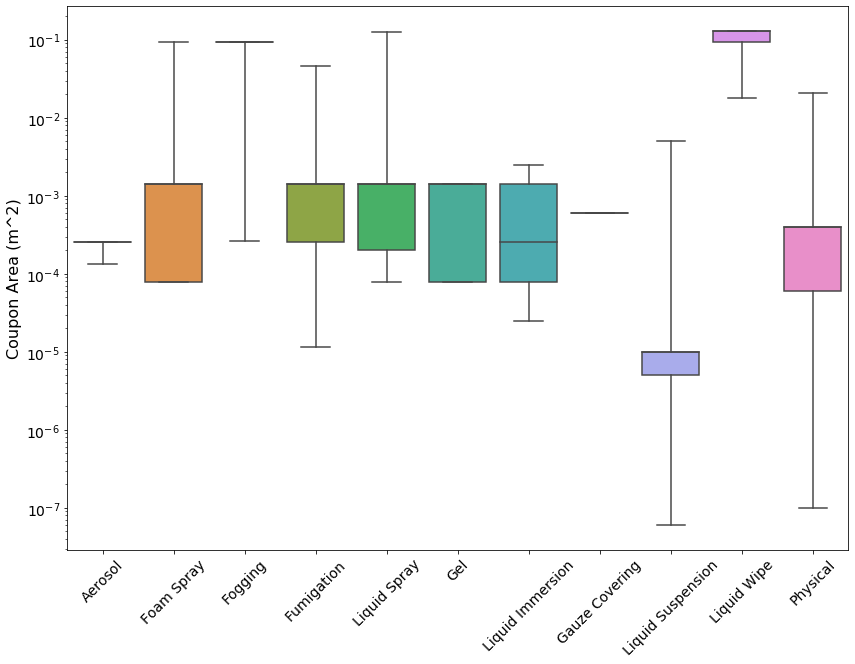

,Application Method,Number of Data Points
0,Aerosol,14
1,Foam Spray,126
2,Fogging,68
3,Fumigation,2559
4,Liquid Spray,1217
5,Gel,9
6,Liquid Immersion,723
7,Gauze Covering,163
8,Liquid Suspension,1162
9,Liquid Wipe,33


Spore Loading (CFU)


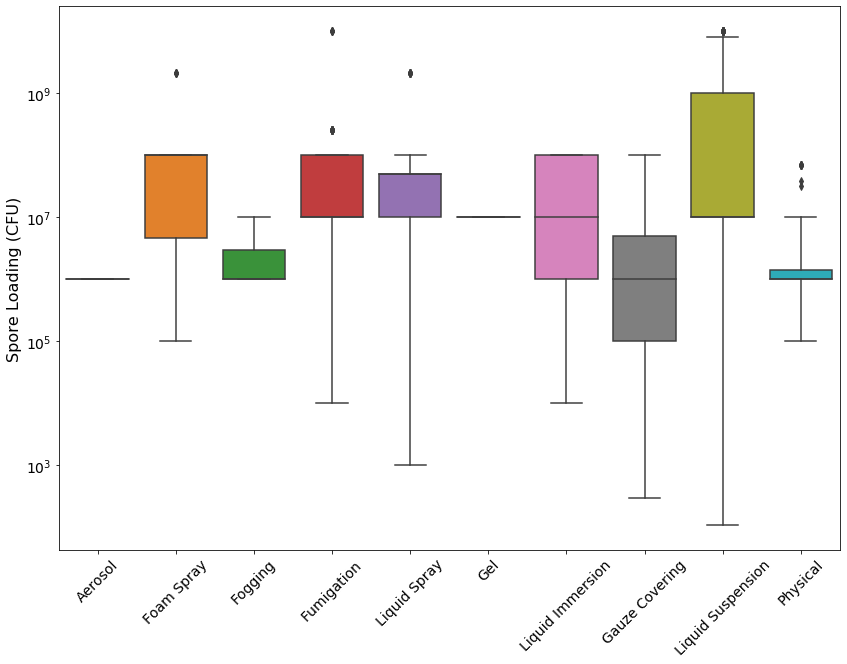

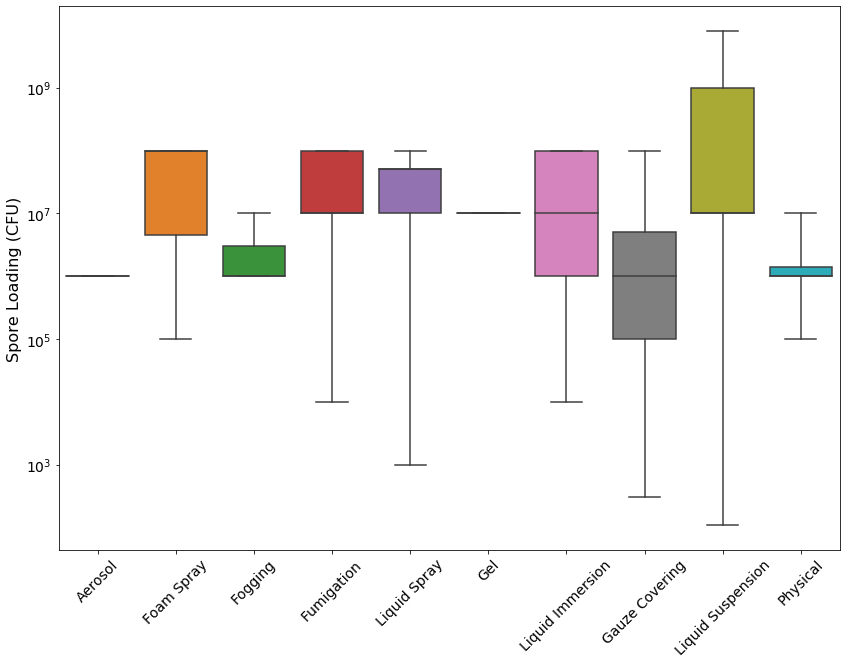

,Application Method,Number of Data Points
0,Aerosol,6
1,Foam Spray,126
2,Fogging,68
3,Fumigation,3058
4,Liquid Spray,1318
5,Gel,9
6,Liquid Immersion,831
7,Gauze Covering,163
8,Liquid Suspension,928
9,Liquid Wipe,0


Number of Applications


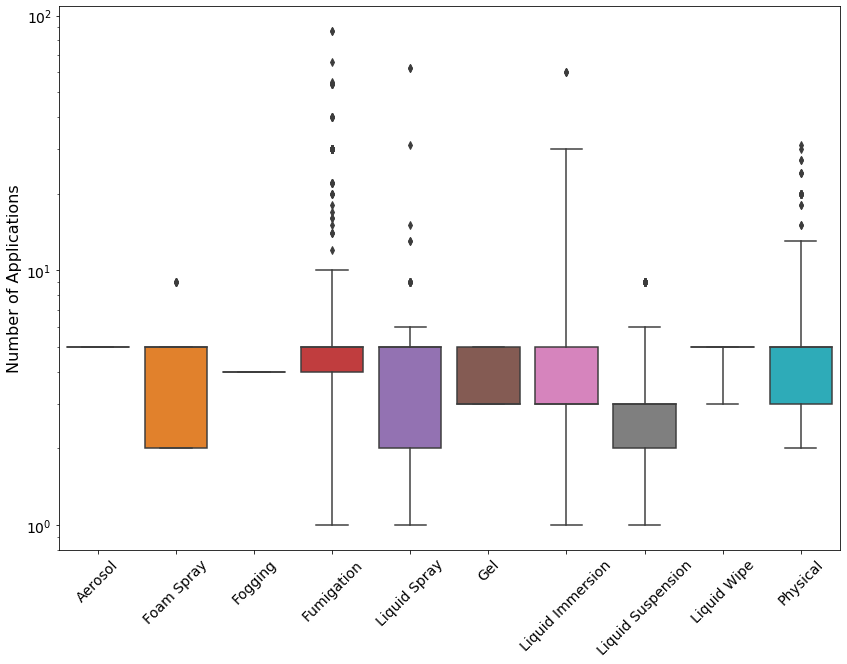

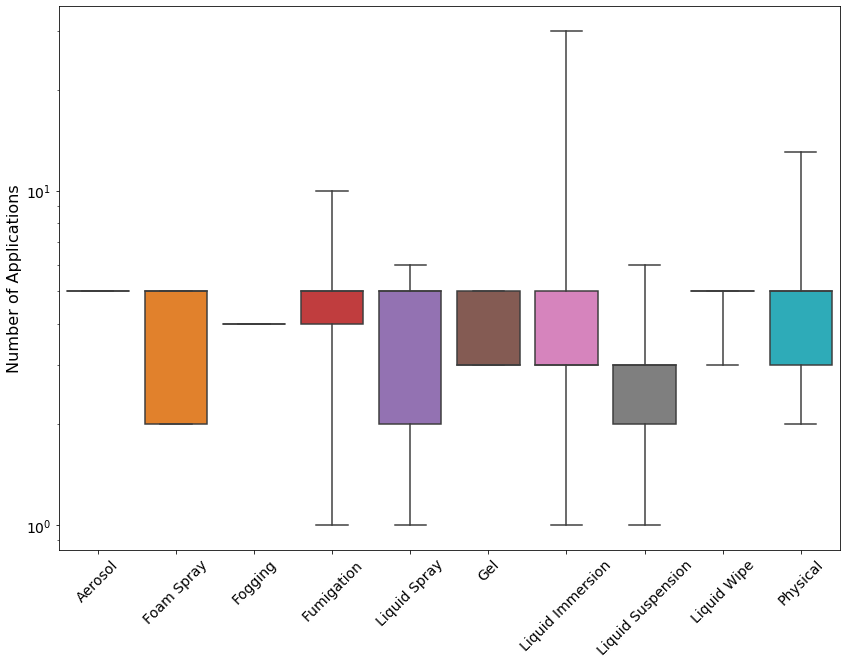

,Application Method,Number of Data Points
0,Aerosol,14
1,Foam Spray,126
2,Fogging,16
3,Fumigation,2946
4,Liquid Spray,1279
5,Gel,9
6,Liquid Immersion,799
7,Gauze Covering,0
8,Liquid Suspension,1497
9,Liquid Wipe,37


Temperature (C)


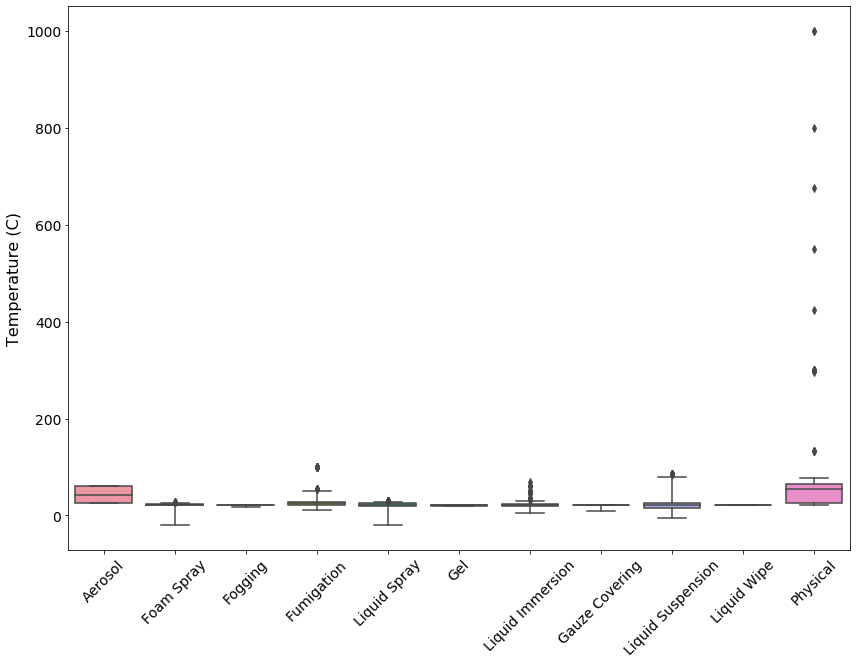

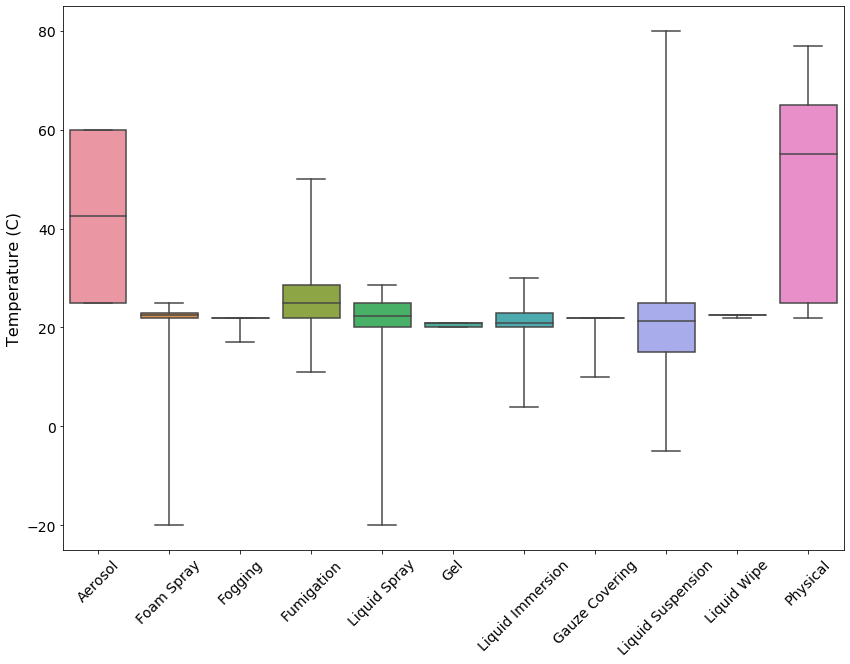

,Application Method,Number of Data Points
0,Aerosol,14
1,Foam Spray,126
2,Fogging,68
3,Fumigation,3001
4,Liquid Spray,1274
5,Gel,9
6,Liquid Immersion,831
7,Gauze Covering,163
8,Liquid Suspension,1680
9,Liquid Wipe,37


Relative Humidity (%)


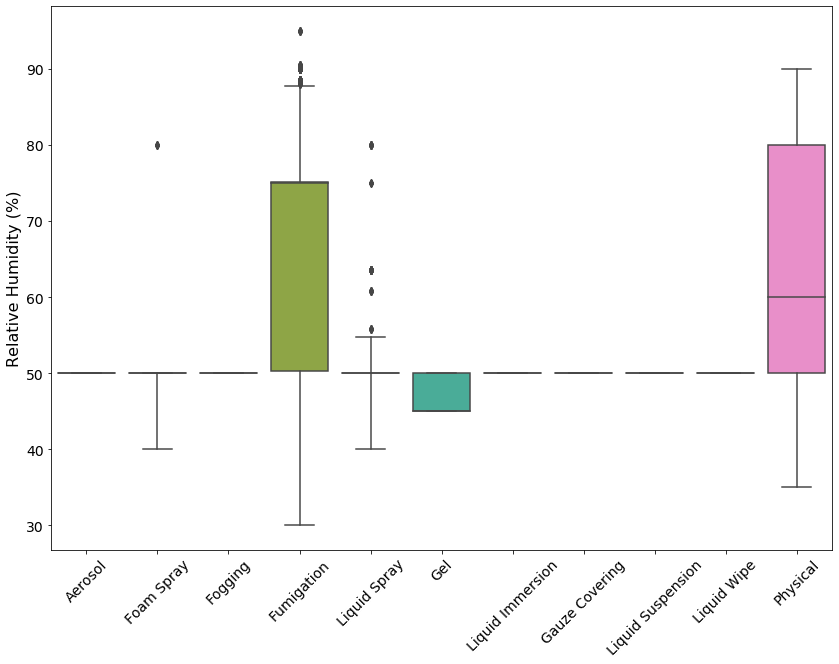

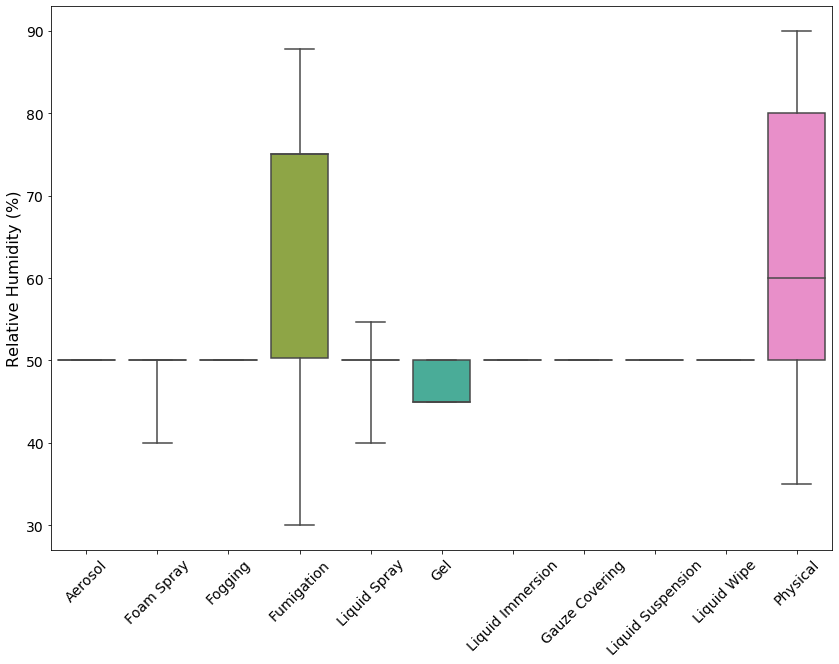

,Application Method,Number of Data Points
0,Aerosol,14
1,Foam Spray,126
2,Fogging,68
3,Fumigation,2984
4,Liquid Spray,1266
5,Gel,9
6,Liquid Immersion,831
7,Gauze Covering,163
8,Liquid Suspension,1660
9,Liquid Wipe,4


ContactTime (min)


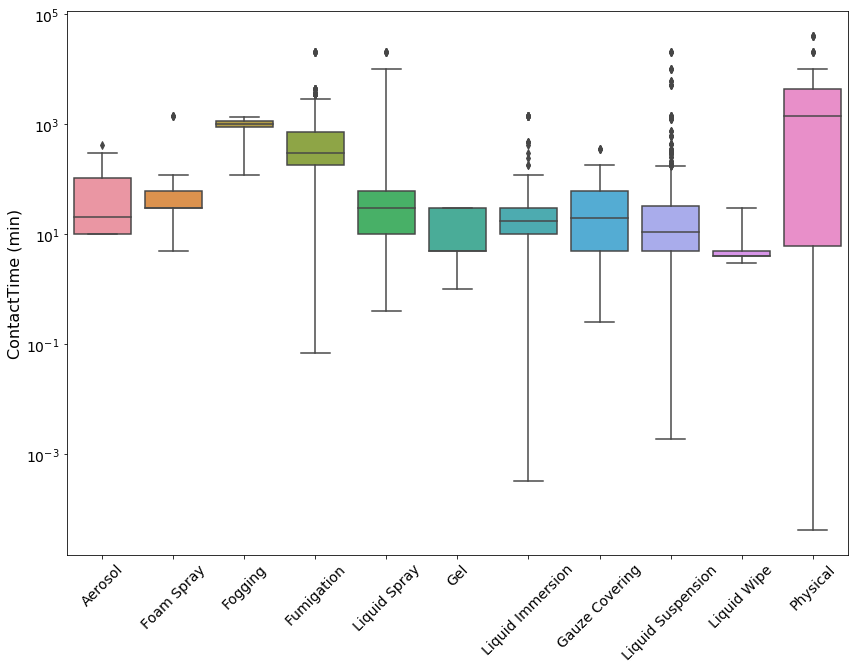

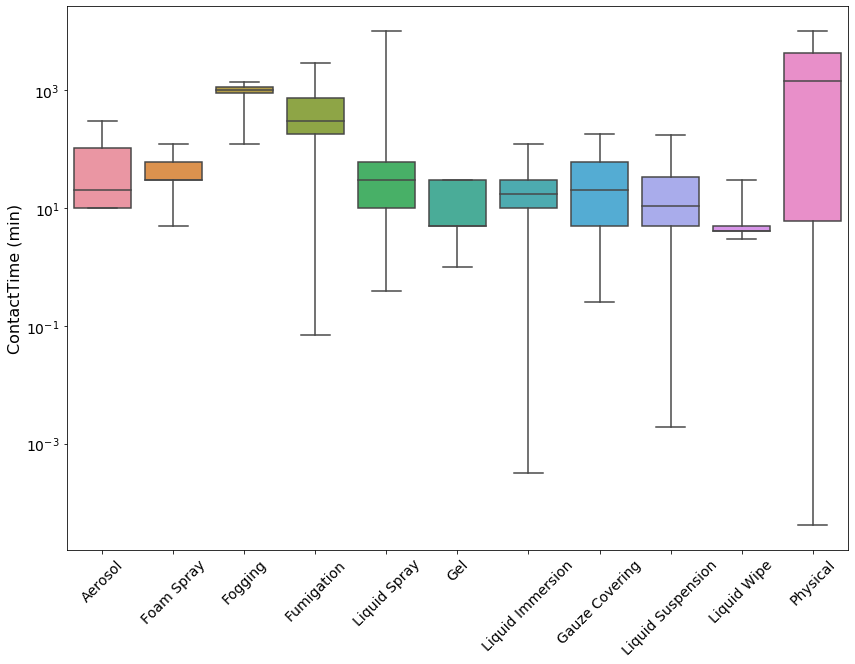

,Application Method,Number of Data Points
0,Aerosol,14
1,Foam Spray,108
2,Fogging,68
3,Fumigation,2984
4,Liquid Spray,1221
5,Gel,9
6,Liquid Immersion,826
7,Gauze Covering,136
8,Liquid Suspension,1626
9,Liquid Wipe,37


Concentration (wt %)


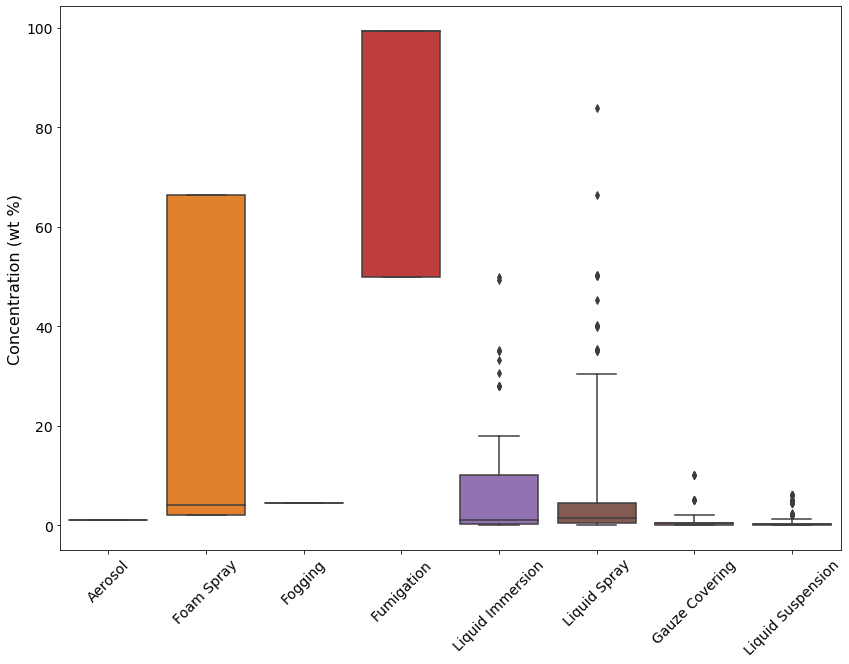

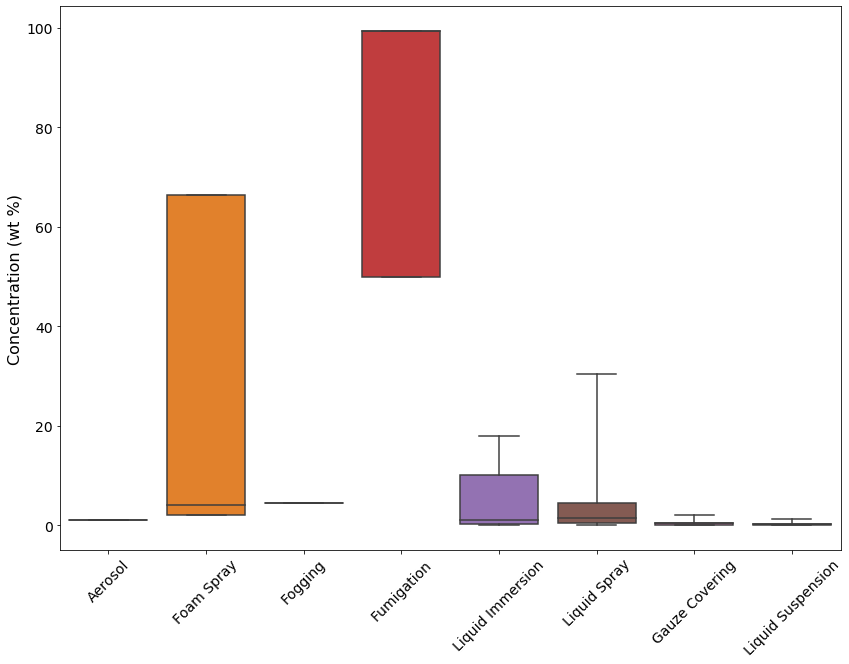

,Application Method,Number of Data Points
0,Aerosol,14
1,Foam Spray,82
2,Fogging,52
3,Fumigation,22
4,Liquid Spray,332
5,Gel,0
6,Liquid Immersion,293
7,Gauze Covering,163
8,Liquid Suspension,616
9,Liquid Wipe,0


Efficacy (Log Reduction)


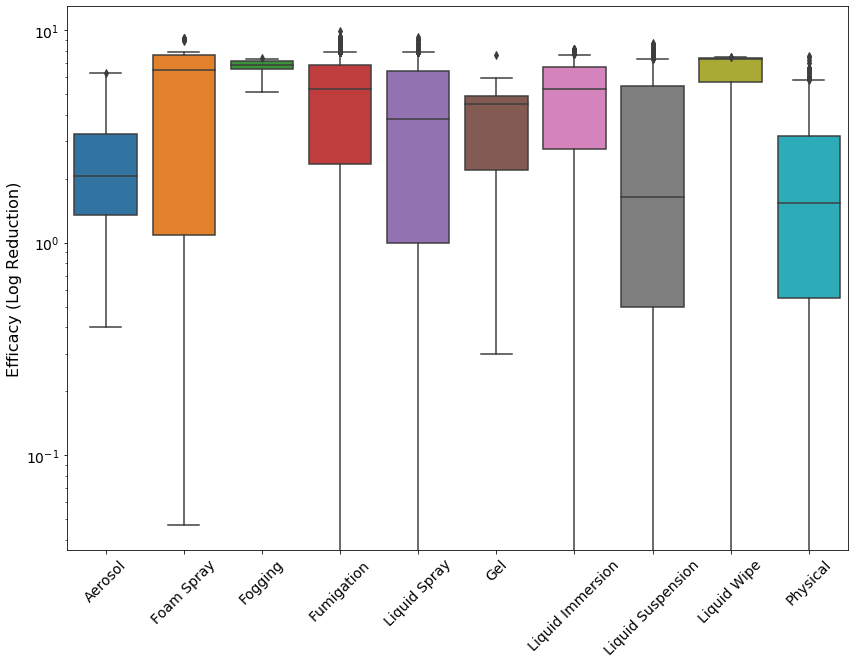

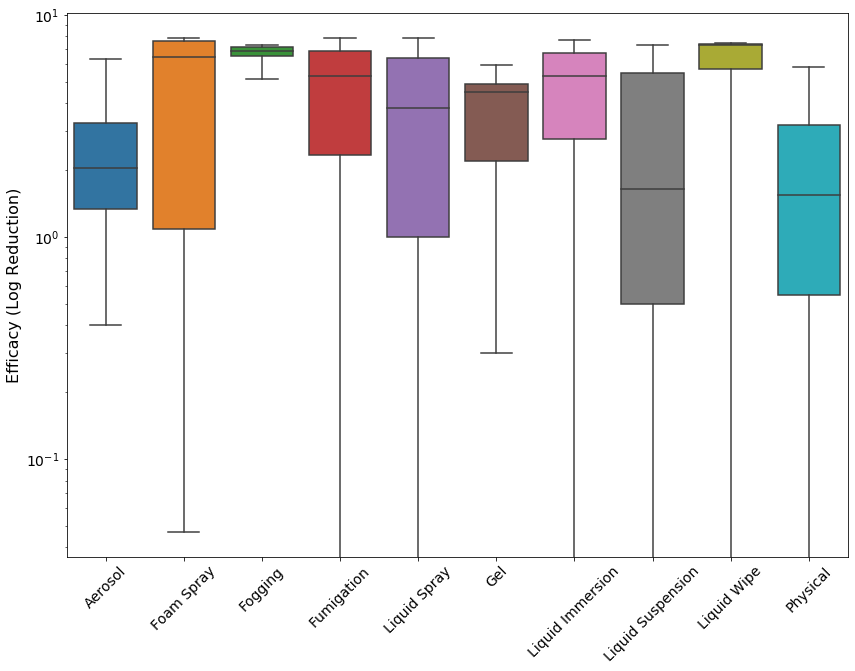

,Application Method,Number of Data Points
0,Aerosol,14
1,Foam Spray,102
2,Fogging,16
3,Fumigation,2395
4,Liquid Spray,1131
5,Gel,9
6,Liquid Immersion,746
7,Gauze Covering,0
8,Liquid Suspension,1373
9,Liquid Wipe,33


Efficacy (% Kill)


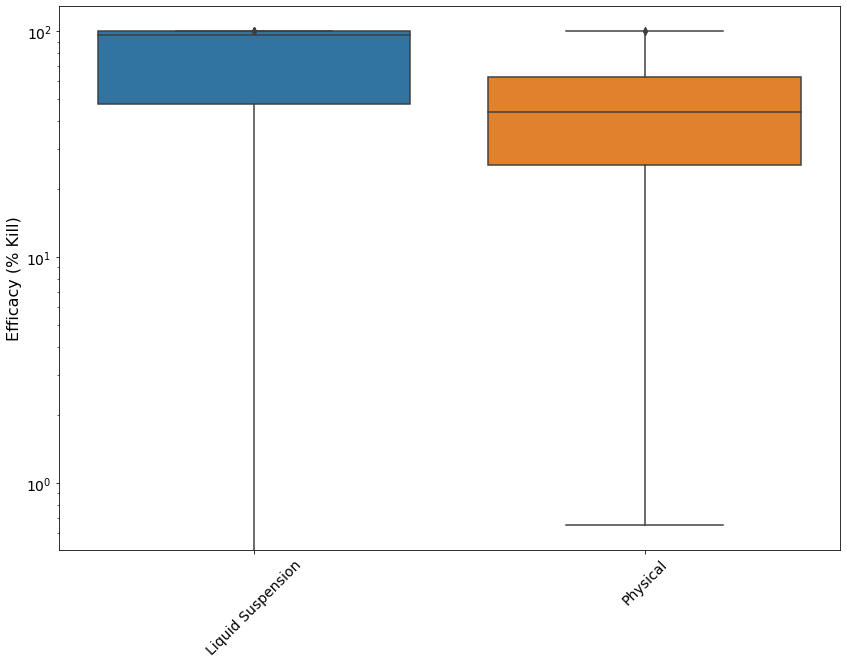

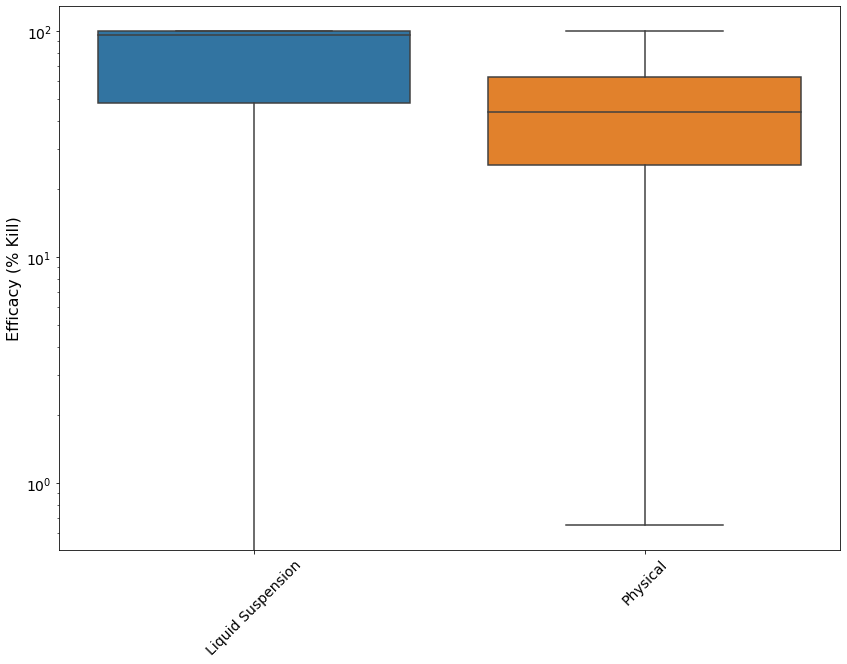

,Application Method,Number of Data Points
0,Aerosol,0
1,Foam Spray,0
2,Fogging,0
3,Fumigation,0
4,Liquid Spray,0
5,Gel,0
6,Liquid Immersion,0
7,Gauze Covering,0
8,Liquid Suspension,90
9,Liquid Wipe,0


Efficacy (% Survived)


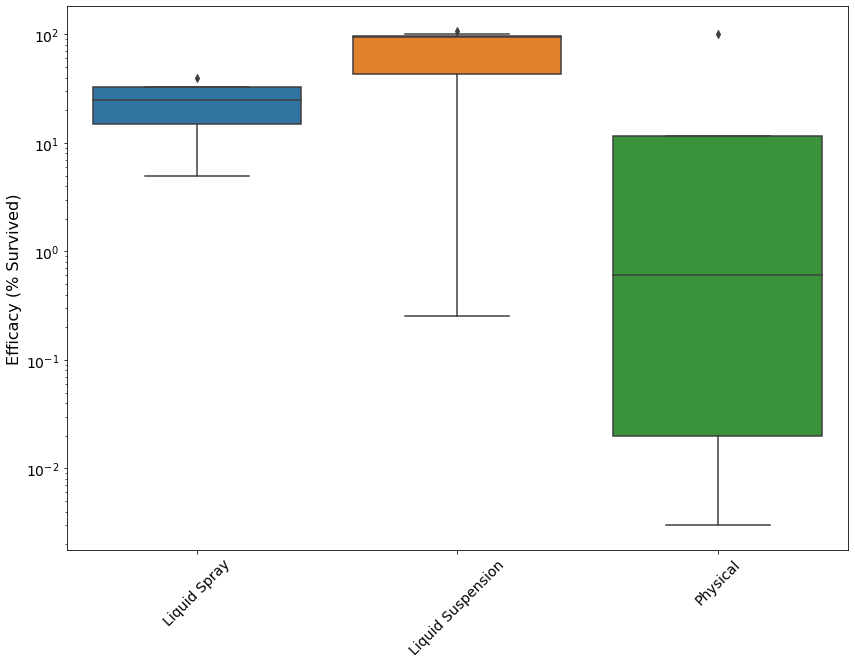

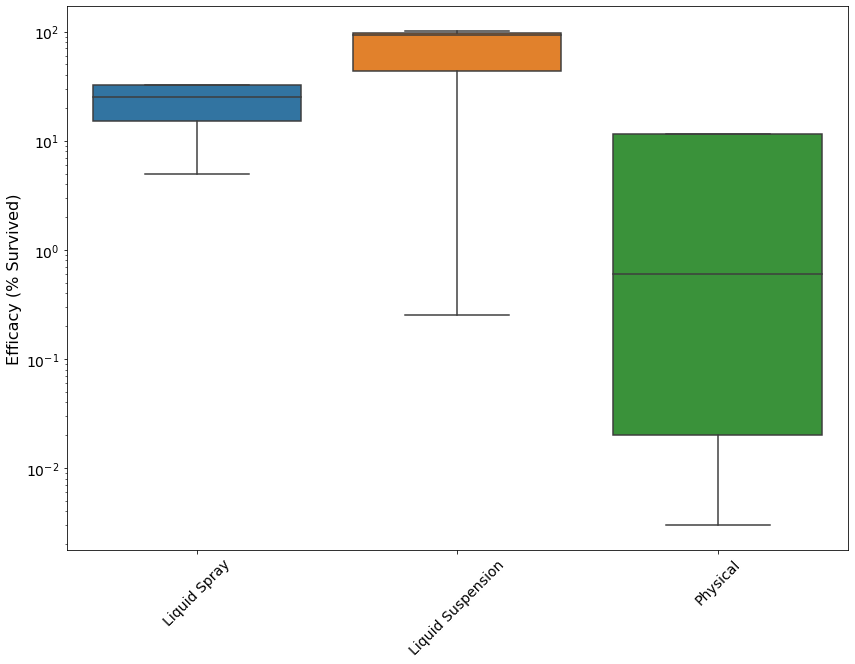

,Application Method,Number of Data Points
0,Aerosol,0
1,Foam Spray,0
2,Fogging,0
3,Fumigation,0
4,Liquid Spray,3
5,Gel,0
6,Liquid Immersion,0
7,Gauze Covering,0
8,Liquid Suspension,15
9,Liquid Wipe,0


In [145]:
def PlotParameter(parameterColumn, parameterName, isLog, additionalFilters=lambda x: True):
    print(f"{parameterName}")
    plt.figure(figsize=(14,10))

    valid_data = origProcessed[(pd.isna(origProcessed[parameterColumn])!= True) &\
        origProcessed.apply(additionalFilters, axis=1) ]

    ax = sns.boxplot(data=valid_data, y=parameterColumn, x="AppMeth", whis=[0, 95])
    if isLog:
        ax.set_yscale('log')
    
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.xlabel("")
    plt.ylabel(parameterName, fontsize=16)

    plt.show()
    
    plt.figure(figsize=(14,10))

    ax = sns.boxplot(data=valid_data, y=parameterColumn, x="AppMeth", whis=[0, 95], showfliers=False)
    if isLog:
        ax.set_yscale('log')
    
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.xlabel("")
    plt.ylabel(parameterName, fontsize=16)

    plt.show()

    df = pd.DataFrame(columns=["Application Method", "Number of Data Points"])

    for meth in valid_coup_area.AppMeth.unique():
        df = df.append(pd.Series({
            "Application Method": meth,
            "Number of Data Points": len(valid_data[valid_data.AppMeth == meth])
        }), ignore_index=True)

    display(df)
for p in params:
    PlotParameter(*p)